In [1]:
import import_ipynb
from Seline import MLR, mclp
import pandas as pd

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

importing Jupyter notebook from Seline.ipynb


# Load Dataset

In [2]:
raw_demand = pd.read_csv('dataset/수요지_데이터셋.csv', index_col=0)
raw_candidate = pd.read_csv('dataset/후보지_정렬2000.csv', index_col=0)

In [3]:
raw_demand = raw_demand.drop(["cell_x","cell_y","charger_count","charger_value"],axis= 1)

In [4]:
for i in range(len(raw_demand)):
    raw_demand.loc[i,"buildings"] = raw_demand.loc[i,"building_religion"] + raw_demand.loc[i,"building_sale"] + raw_demand.loc[i,"building_edu"] + raw_demand.loc[i,"building_work"]

array([[<AxesSubplot:title={'center':'car'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'houses'}>,
        <AxesSubplot:title={'center':'houses_parking'}>],
       [<AxesSubplot:title={'center':'building_religion'}>,
        <AxesSubplot:title={'center':'building_sale'}>,
        <AxesSubplot:title={'center':'building_edu'}>,
        <AxesSubplot:title={'center':'building_work'}>],
       [<AxesSubplot:title={'center':'building_factory'}>,
        <AxesSubplot:title={'center':'public_parking_lot'}>,
        <AxesSubplot:title={'center':'public_parking_space'}>,
        <AxesSubplot:title={'center':'tot_count_'}>],
       [<AxesSubplot:title={'center':'buildings'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

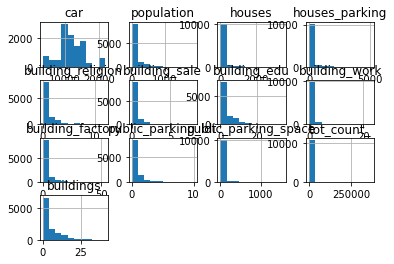

In [5]:
raw_demand.hist()

In [6]:
raw_demand.describe()

,car,population,houses,houses_parking,building_religion,building_sale,building_edu,building_work,building_factory,public_parking_lot,public_parking_space,tot_count_,buildings
count,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.00000,10829.000000,10829.000000
mean,11842.889379,91.210730,72.585927,93.465971,0.990858,0.294210,3.147936,0.865362,3.345277,0.503648,52.90507,894.505477,5.298366
std,3868.637828,176.674292,244.714359,331.130764,1.413171,0.776374,4.536119,2.183021,6.320860,1.286496,178.26068,6439.686231,6.332589
min,3607.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.011000,0.000000
25%,9713.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,13.455000,1.000000
50%,12192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,59.160000,3.000000
75%,14200.000000,95.000000,0.000000,0.000000,2.000000,0.000000,5.000000,1.000000,4.000000,0.000000,0.00000,363.179000,8.000000
max,21707.000000,1876.000000,3511.000000,5082.000000,12.000000,8.000000,34.000000,23.000000,53.000000,10.000000,1532.00000,368129.236000,41.000000


In [7]:
temp = raw_demand.loc[raw_demand.population > raw_demand.population.quantile(0.75)]
temp

,car,population,houses,houses_parking,building_religion,building_sale,building_edu,building_work,building_factory,public_parking_lot,public_parking_space,tot_count_,buildings
72,21707.0,117,236,310,0,0,0,0,0,0,0,35.326,0.0
73,21707.0,138,236,310,0,0,0,0,0,0,0,466.375,0.0
74,21707.0,110,0,0,0,0,0,0,0,0,0,1852.866,0.0
82,15921.0,123,0,0,0,0,2,0,0,0,0,77.537,2.0
95,15921.0,122,0,0,0,0,2,0,0,0,0,61.326,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,9713.0,228,0,0,0,0,3,0,0,0,0,3.071,3.0
10597,3607.0,207,0,0,3,0,10,1,1,1,47,33.793,14.0
10603,3607.0,192,0,0,3,0,10,1,1,2,84,20.088,14.0
10621,3607.0,117,0,0,3,0,10,1,1,3,131,44.720,14.0


array([[<AxesSubplot:title={'center':'car'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'houses'}>,
        <AxesSubplot:title={'center':'houses_parking'}>],
       [<AxesSubplot:title={'center':'building_religion'}>,
        <AxesSubplot:title={'center':'building_sale'}>,
        <AxesSubplot:title={'center':'building_edu'}>,
        <AxesSubplot:title={'center':'building_work'}>],
       [<AxesSubplot:title={'center':'building_factory'}>,
        <AxesSubplot:title={'center':'public_parking_lot'}>,
        <AxesSubplot:title={'center':'public_parking_space'}>,
        <AxesSubplot:title={'center':'tot_count_'}>],
       [<AxesSubplot:title={'center':'buildings'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

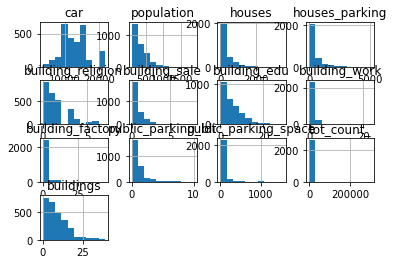

In [8]:
temp.hist()

In [9]:
temp.describe()

,car,population,houses,houses_parking,building_religion,building_sale,building_edu,building_work,building_factory,public_parking_lot,public_parking_space,tot_count_,buildings
count,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000
mean,12974.998552,338.813240,240.197855,310.205621,1.505917,0.546967,5.056583,1.356879,1.332470,0.918639,89.144601,2423.504908,8.466346
std,3765.310185,205.254275,401.996303,551.823612,1.567085,0.960568,4.828787,2.975210,3.353956,1.654834,212.398233,10067.985181,7.087763
min,3607.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.034000,0.000000
25%,10377.000000,187.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,112.276250,3.000000
50%,12574.000000,278.500000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,437.732000,7.000000
75%,15262.000000,445.000000,404.750000,497.250000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,59.000000,1489.597000,12.000000
max,21707.000000,1876.000000,3511.000000,5082.000000,7.000000,8.000000,29.000000,23.000000,44.000000,10.000000,1532.000000,304571.752000,39.000000


In [10]:
raw_candidate

,cell_x,cell_y,cnt_cust*charger_val
0,127.075577,37.229037,345469.765400
1,127.072773,37.326377,281137.608500
2,127.078416,37.326397,157946.033400
3,127.083006,37.312893,138673.965000
4,127.089601,37.345366,114740.448000
...,...,...,...
1995,127.124828,37.299512,591.654180
1996,127.127000,37.316645,590.826000
1997,127.132574,37.098522,590.358000
1998,127.131695,37.279703,590.295343


# 전처리 & 입지선정지수

In [11]:
temp = raw_demand.drop(["building_religion","building_sale","building_edu","building_work"],axis = 1)
temp

,car,population,houses,houses_parking,building_factory,public_parking_lot,public_parking_space,tot_count_,buildings
0,20322.0,13,0,0,0,0,0,90.944,1.0
1,20322.0,0,0,0,0,0,0,22.332,1.0
2,20322.0,21,0,0,0,0,0,14.954,1.0
3,20322.0,18,0,0,0,0,0,10.450,1.0
4,20322.0,0,0,0,0,0,0,2080.344,0.0
...,...,...,...,...,...,...,...,...,...
10824,3607.0,0,0,0,0,0,0,97.318,5.0
10825,3607.0,0,0,0,0,0,0,58.772,5.0
10826,3607.0,0,0,0,0,0,0,106.540,0.0
10827,3607.0,0,0,0,0,0,0,49.656,0.0


In [12]:
scaler = StandardScaler()
idx_scaled = scaler.fit_transform(temp)
idx_x = temp.drop(["tot_count_","buildings"],axis=1)
idx_y = temp.tot_count_

In [13]:
idx_x

,car,population,houses,houses_parking,building_factory,public_parking_lot,public_parking_space
0,20322.0,13,0,0,0,0,0
1,20322.0,0,0,0,0,0,0
2,20322.0,21,0,0,0,0,0
3,20322.0,18,0,0,0,0,0
4,20322.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
10824,3607.0,0,0,0,0,0,0
10825,3607.0,0,0,0,0,0,0
10826,3607.0,0,0,0,0,0,0
10827,3607.0,0,0,0,0,0,0


In [14]:
# # scikit-learn PCA
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 5)

# # fit
# X_pca = pca.fit_transform(idx_x)

# display(X_pca.shape, X_pca)

In [15]:
# df = pd.DataFrame(X_pca)
# df

In [16]:
# idx_y = idx_y.reset_index(drop=True)

In [17]:
display('pca variance : ', pca.explained_variance_ratio_)

NameError: name 'pca' is not defined

In [18]:
idx_model = MLR(idx_x, idx_y)
idx_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             tot_count_   R-squared (uncentered):                   0.057
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              93.97
Date:                Thu, 13 Oct 2022   Prob (F-statistic):                   1.13e-133
Time:                        03:08:53   Log-Likelihood:                     -1.1012e+05
No. Observations:               10829   AIC:                                  2.203e+05
Df Residuals:                   10822   BIC:                                  2.203e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
car                      0.0117      0.006      1.838      0.066      -0.001       0.024
population               6.8465      0.392     17.458      0.000       6.078       7.615
houses                  -1.9058      0.822     -2.319      0.020      -3.517      -0.295
houses_parking           1.8717      0.598      3.131      0.002       0.700       3.044
building_factory        27.6590      9.458      2.924      0.003       9.119      46.199
public_parking_lot    -114.0723     82.269     -1.387      0.166    -275.335      47.191
public_parking_space     1.1990      0.588      2.038      0.042       0.046       2.352
==============================================================================
Omnibus:                    29523.114   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1194861869.137
Skew:                          33.828   Prob(JB):                         0.00
Kurtosis:                    1628.903   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

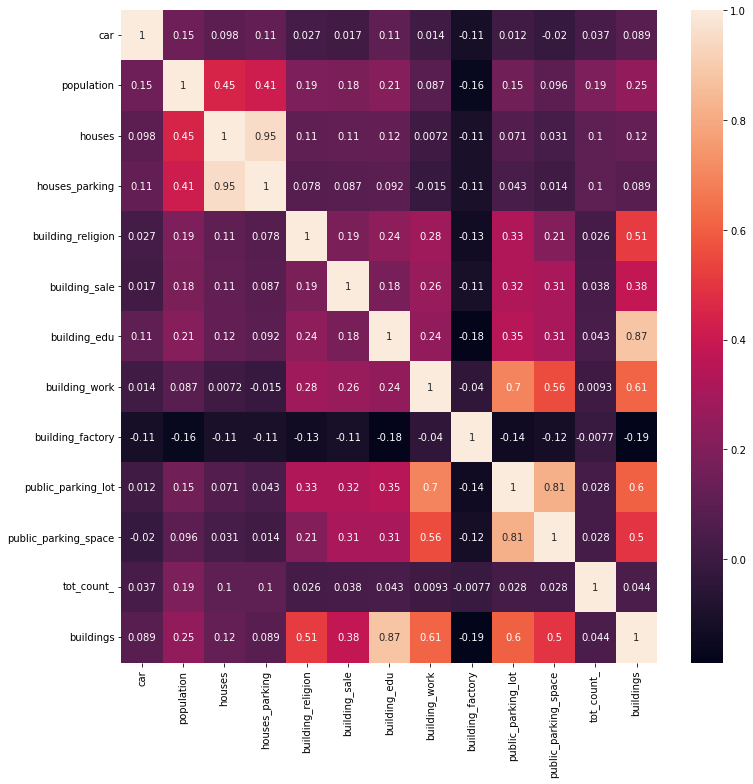

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(raw_demand.corr(), annot=True)